# Processing Pipeline

### Import Data

In [60]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('four_class_anomaly_detection.csv')

# Display the first few rows to ensure it was loaded correctly
df.head()

,AIL1,AIL2,AOAC,BAL,CAS,CRSS,DA,ELEV1,FLAP,GLS,...,N2,PT,PTCH,ROLL,RUDD,TH,VRTG,WS,Label,FlightID
0,81.261190,82.652336,-8.111792,1969.6174,155.57140,-2.109358,-0.692778,-4.952854,3065.0,0.01794,...,70.74118,985.42550,-3.662262,0.785912,-0.390141,-1.081870,0.972379,12.625183,0,1
1,79.604095,81.015700,-7.644611,1955.6995,154.51205,-2.109358,-0.867216,-5.198349,3065.0,0.01950,...,70.71775,985.52030,-3.665276,0.046774,-0.756234,-0.704820,0.770077,11.893839,0,1
2,81.302110,80.770200,-7.552573,1940.0267,153.32867,-2.109358,-1.424093,-4.830105,3065.0,0.01872,...,70.70276,985.41650,-3.940319,0.804820,-1.325632,-0.240446,0.543937,12.559112,0,1
3,82.345470,83.900276,-8.395265,1924.5493,150.88818,-2.109358,-1.141912,-4.625526,3065.0,0.01677,...,70.74159,984.81710,-4.275129,1.077102,-0.326884,-0.191627,1.062817,10.542998,0,1
4,81.874930,82.754620,-7.854284,1905.3670,150.69461,-2.109358,-0.724660,-4.400490,3065.0,0.01677,...,70.57045,985.23065,-4.241483,1.654806,0.129545,-0.528425,0.867628,9.713539,0,1


## Ratio Customization Function

In [61]:
import pandas as pd

def load_and_trim_dataset(file_path, ratio=20):
    """
    Load a dataset from a CSV file and trim it to have a specified observation to feature ratio.
    Also, display the number of classes for the dataset.
    
    Parameters:
    - file_path: str, path to the CSV file
    - ratio: int, the desired observation to feature ratio (default is 5)
    
    Returns:
    - trimmed_df: pd.DataFrame, the trimmed dataset
    """
    # Load the dataset
    df = pd.read_csv(file_path)
    
    # Check the number of features and observations
    n_features = df.shape[1] - 1  # Exclude the target column
    n_observations = df.shape[0]
    
    # Calculate the required number of observations for the specified ratio
    required_observations = n_features * ratio
    
    # Check if the dataset meets the observation to feature ratio
    if n_observations < required_observations:
        raise ValueError(f"The dataset does not meet the {ratio}:1 observation to feature ratio. "
                         f"Required observations: {required_observations}, but got {n_observations}.")
    
    # Randomly select rows to meet the observation to feature ratio
    trimmed_df = df.sample(n=required_observations, random_state=42)
    
    # Display the number of classes in the target column
    target_column = df.columns[-1]
    n_classes = df[target_column].nunique()
    
    print(f"The dataset has {n_classes} classes.")
    
    return trimmed_df

# Example usage:
# trimmed_df = load_and_trim_dataset('path_to_your_dataset.csv', ratio=5)
# print(trimmed_df.head())


In [62]:
trimmed_df = load_and_trim_dataset('four_class_anomaly_detection.csv')

The dataset has 1070 classes.


In [63]:
trimmed_df

,AIL1,AIL2,AOAC,BAL,CAS,CRSS,DA,ELEV1,FLAP,GLS,...,N2,PT,PTCH,ROLL,RUDD,TH,VRTG,WS,Label,FlightID
167221,86.355240,81.24074,1.965392,2981.67750,214.056300,-167.07889,2.300629,0.366226,116.0,-7.878000e-02,...,62.674496,975.82900,4.445654,-0.521557,0.811528,-162.110340,0.976856,9.022274,3,99344
44581,85.373250,83.28653,-1.430876,1413.90870,123.883290,118.91517,-6.106650,-3.377586,3630.0,-1.793999e-02,...,81.602900,988.14070,-0.282429,-2.441121,0.646362,128.073330,1.071528,18.900366,0,44481
106597,85.025470,82.24318,-9.354819,2279.71830,163.916810,0.00000,-2.373273,-7.366898,3020.0,5.460000e-03,...,59.930504,996.27960,-6.720694,2.759471,-1.121495,-56.811440,1.004811,10.953331,1,91764
75326,85.475540,84.47310,-7.412288,1197.78870,125.702484,50.97620,-6.657376,-4.891479,3674.0,8.073000e-02,...,79.799360,988.84880,-5.132527,1.576002,-0.857624,60.500927,0.967993,15.182569,0,75201
152094,87.173550,83.26608,-7.218796,867.68770,124.537810,171.91284,5.106165,-4.093617,3652.0,-1.170000e-15,...,76.840790,1003.00073,-5.356843,4.932896,-0.115730,-29.357756,0.991821,15.169687,2,97444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51596,87.439514,84.80043,-4.600057,838.14374,121.219620,132.88968,1.050299,-6.221249,3637.0,3.120000e-03,...,82.805030,1013.84190,-1.851190,-0.652830,0.063969,131.462460,0.905600,25.290283,0,51521
114279,84.370804,82.57050,-5.363335,1307.18640,173.925000,-94.04230,-1.479354,-6.343998,2516.0,1.560000e-03,...,61.300266,1024.70400,-1.704085,-0.592098,-0.191302,-102.564026,0.576390,8.008799,1,92724
79793,83.204704,87.03035,-6.149796,1297.15150,122.374054,118.91517,-1.151010,-3.602627,3657.0,2.340000e-03,...,77.959526,1010.59515,-2.790544,-0.375985,0.932002,122.397040,0.897140,5.126720,0,79681
105555,88.073710,83.32745,-1.823976,1060.21910,124.743210,0.00000,1.099209,-5.709801,3652.0,-9.360017e-03,...,80.841510,1003.37460,-1.222973,1.338330,-1.031443,-152.333630,1.020342,20.011906,1,91624


## Baseline Model Training and Original Analysis

In [64]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

# Prepare the features and target variable
X = trimmed_df.drop(columns=['Label', 'FlightID'])  # Features
y = trimmed_df['Label']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

param_grid = {
    'max_depth': [5, 10, 15],
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.05, 0.1, 0.2]
}

grid_search = GridSearchCV(
    XGBClassifier(random_state=42),
    param_grid,
    scoring='f1_macro',  # Focus on macro F1-score
    cv=5
)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

# XGBoost model
model = XGBClassifier(
    max_depth=10,            # Maximum depth of trees
    n_estimators=300,        # Number of boosting rounds
    learning_rate=0.1,       # Learning rate
    objective='multi:softmax',  # Objective for multiclass classification
    random_state=42
)

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the XGBoost model: {accuracy:.2f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.83      0.73        46
           1       0.54      0.30      0.39        23
           2       0.10      0.11      0.11         9
           3       0.33      0.17      0.22         6

    accuracy                           0.56        84
   macro avg       0.41      0.35      0.36        84
weighted avg       0.54      0.56      0.53        84

Accuracy of the XGBoost model: 0.56

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.83      0.73        46
           1       0.54      0.30      0.39        23
           2       0.10      0.11      0.11         9
           3       0.33      0.17      0.22         6

    accuracy                           0.56        84
   macro avg       0.41      0.35      0.36        84
weighted avg       0.54      0.56      0.53        84



In [65]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Prepare the features and target variable
X = trimmed_df.drop(columns=['Label', 'FlightID'])  # Features
y = trimmed_df['Label']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest model: {accuracy:.2f}")

Accuracy of the Random Forest model: 0.54


In [66]:
from sklearn.metrics import classification_report, accuracy_score

# Train the Random Forest with the best parameters
best_model = RandomForestClassifier(
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=3,
    n_estimators=300,
    random_state=42
)
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.51

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.76      0.69        46
           1       0.38      0.26      0.31        23
           2       0.10      0.11      0.11         9
           3       0.33      0.17      0.22         6

    accuracy                           0.51        84
   macro avg       0.36      0.32      0.33        84
weighted avg       0.49      0.51      0.49        84



In [67]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
import seaborn as sns
import numpy as np


# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [300],
    'max_depth': [None],
    'min_samples_split': [3],
    'min_samples_leaf': [1],
    'max_features': ['sqrt']
}

# Use StratifiedKFold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=5)

# Perform grid search with stratified cross-validation
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=stratified_kfold)
grid_search.fit(X_train, y_train)

# Print best parameters and best score from grid search
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.2f}")

# Train a Random Forest model with tuned parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 300}
Best cross-validation score: 0.90


Accuracy of the Random Forest model with tuned parameters: 0.51

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.76      0.69        46
           1       0.38      0.26      0.31        23
           2       0.10      0.11      0.11         9
           3       0.33      0.17      0.22         6

    accuracy                           0.51        84
   macro avg       0.36      0.32      0.33        84
weighted avg       0.49      0.51      0.49        84



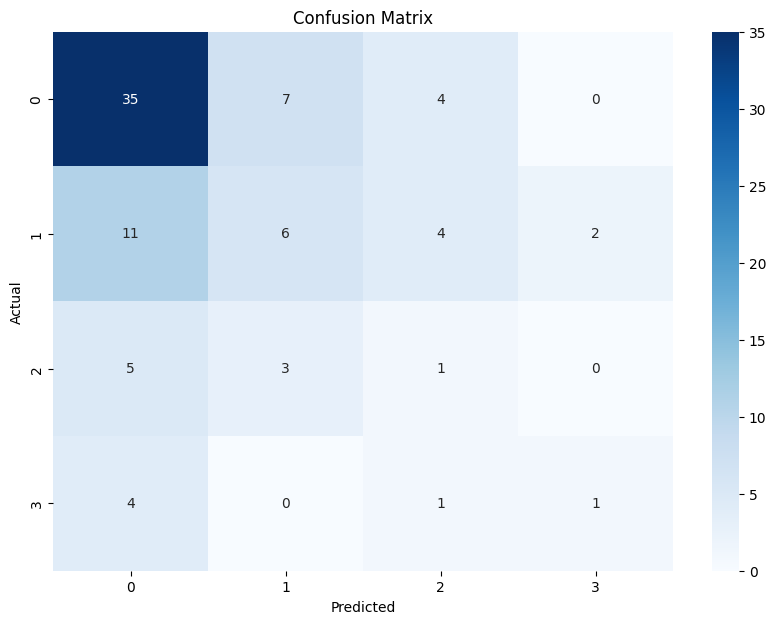

Number of classes in y_test does not match the number of columns in y_pred_proba.


In [68]:
# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest model with tuned parameters: {accuracy:.2f}")

# Print classification report and confusion matrix for detailed analysis
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate and print ROC-AUC score
y_pred_proba = best_model.predict_proba(X_test)
if y_pred_proba.shape == len(np.unique(y_test)):
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    print(f"ROC-AUC Score: {roc_auc:.2f}")
else:
    print("Number of classes in y_test does not match the number of columns in y_pred_proba.")

Best parameters: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validation score: 0.87
Accuracy of the SVM model with tuned parameters: 0.49

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.78      0.67        46
           1       0.33      0.22      0.26        23
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         6

    accuracy                           0.49        84
   macro avg       0.23      0.25      0.23        84
weighted avg       0.41      0.49      0.44        84



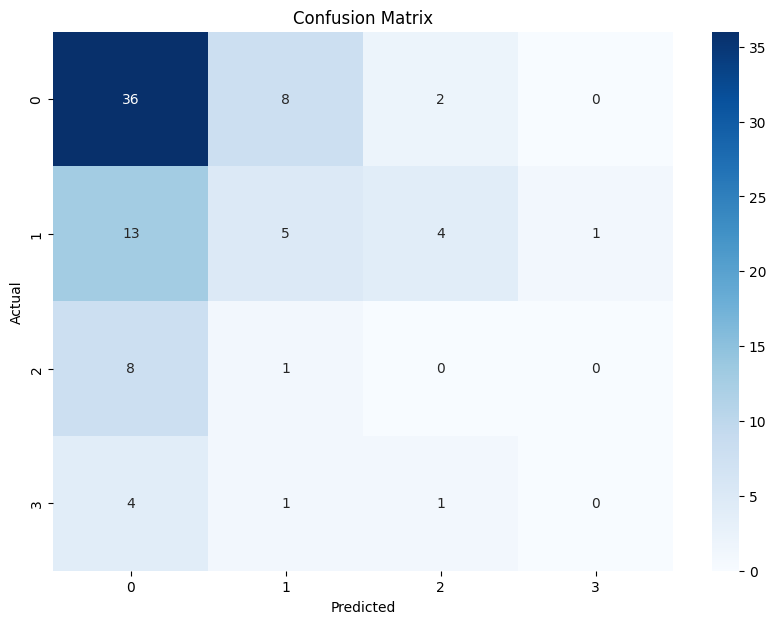

Number of classes in y_test does not match the number of columns in y_pred_proba.


In [69]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

# Use StratifiedKFold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=5)

# Perform grid search with stratified cross-validation
grid_search = GridSearchCV(SVC(probability=True, random_state=42), param_grid, cv=stratified_kfold)
grid_search.fit(X_train, y_train)

# Print best parameters and best score from grid search
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.2f}")

# Train an SVM model with tuned parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM model with tuned parameters: {accuracy:.2f}")

# Print classification report and confusion matrix for detailed analysis
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate and print ROC-AUC score
y_pred_proba = best_model.predict_proba(X_test)
if y_pred_proba.shape == len(np.unique(y_test)):
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    print(f"ROC-AUC Score: {roc_auc:.2f}")
else:
    print("Number of classes in y_test does not match the number of columns in y_pred_proba.")